# Penguins Final Project

## Project Topic

The main idea behind this project is to utilize the Palmer Penguins dataset to accuaretly classify penguins as one of the three species: chinstrap, adelie, or gentoo. This project will compare different classification methods, including a decision tree classifier, a randomforest classifier, and support vector classifier. Each model will be trained and tested on the same datasets, and we will choose the most accurate model at the end.

In [1]:
# Loading in packages and libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline

## Data Import and Preparation

The data comes from the Palmer Penguins dataset which is readily available at this site: https://allisonhorst.github.io/palmerpenguins/ (citation below). The data is in a tabulated format, all coming from the same dataset. The data includes 8 features and an id column. The features are the following: species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, and year. The target in the models will be species, as we want to be able to predict what species a certain penguin is based on the other features. 

Citation: 
Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
Archipelago (Antarctica) penguin data. R package version 0.1.0.
https://allisonhorst.github.io/palmerpenguins/

In [2]:
#Reading in Data
data = pd.read_csv('penguins.csv')
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
data.shape

(344, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


All data is the expected datatype

In [5]:
data.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


The rowid will not be used in any analysis, as it simply an id field. The year will also be removed, as the data was collected evenly across three years. While the number of missing values is small, it's hard to impute them properly as in some cases there is almost no information. For example, there may be a possibility of getting sex from averages around the body mass, but in some circumstances there is no body mass listed either.

In [6]:
#removing the rowid column, as it won't be used in any analysis or visuals
data = data.drop(['rowid', 'year'], axis =1)
# Removing rows with null values, as there's no good way to impute them
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Now to check if the data is balanced properly across the different features and if I need to normalize the numeric values.

array([[<AxesSubplot:title={'center':'bill_length_mm'}>,
        <AxesSubplot:title={'center':'bill_depth_mm'}>],
       [<AxesSubplot:title={'center':'flipper_length_mm'}>,
        <AxesSubplot:title={'center':'body_mass_g'}>]], dtype=object)

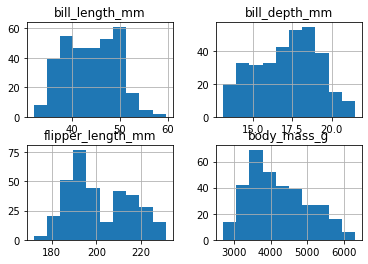

In [7]:
data.hist()

<AxesSubplot:>

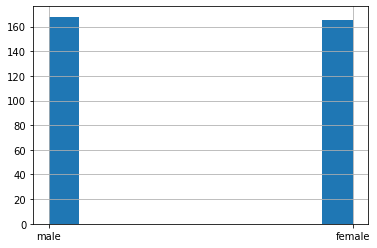

In [8]:
data['sex'].hist()

To ensure that the data is all on the same scale, I will go ahead and normalize the data.

In [9]:
#Normalizing numeric data
normalCols = ['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm']
dataNorm = data
dataNorm[normalCols] = dataNorm[normalCols].apply(lambda x: (x - x.mean()) / x.std())
dataNorm.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.894695,0.779559,-1.424608,-0.567621,male
1,Adelie,Torgersen,-0.821552,0.119404,-1.067867,-0.505525,female
2,Adelie,Torgersen,-0.675264,0.424091,-0.425733,-1.188572,female
4,Adelie,Torgersen,-1.333559,1.084246,-0.568429,-0.940192,female
5,Adelie,Torgersen,-0.858123,1.744400,-0.782474,-0.691811,male


array([[<AxesSubplot:title={'center':'bill_length_mm'}>,
        <AxesSubplot:title={'center':'bill_depth_mm'}>],
       [<AxesSubplot:title={'center':'flipper_length_mm'}>,
        <AxesSubplot:title={'center':'body_mass_g'}>]], dtype=object)

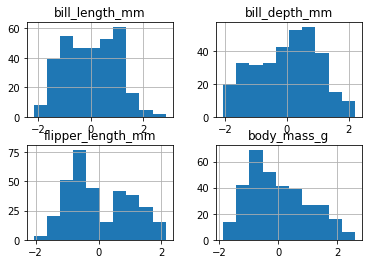

In [10]:
dataNorm.hist()

We can see that the data distributions didn't change, but now they are on the same scale

## Checking Collinearity and Correlation

To make sure that the data isn't directly correlated across the features and that there isn't any collinearity, I will create pairs plots and analyze them.

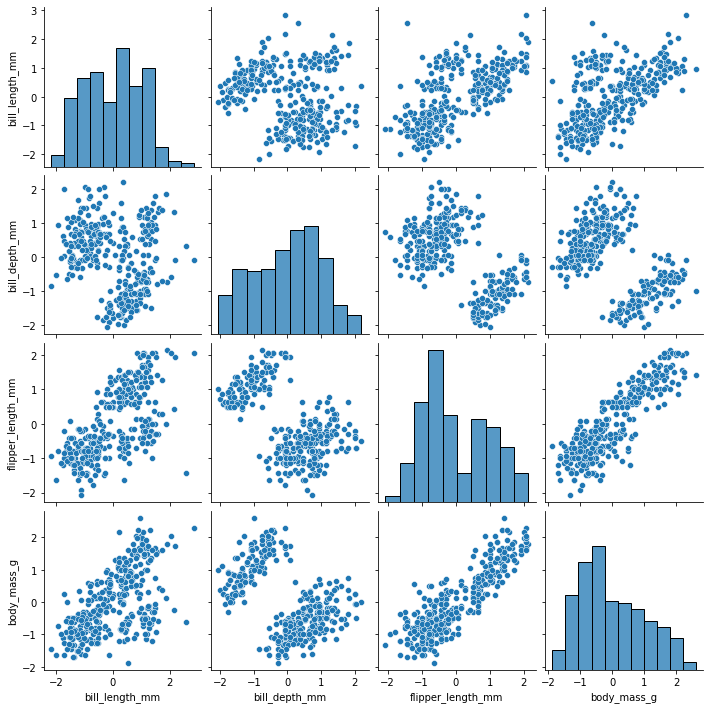

In [11]:
import seaborn as sns
sns.pairplot(dataNorm)

Based on this I would say that body_mass_g and flipper_length_mm may be correlated with one another, so let's look at the heatmap to see further:

In [12]:
dataNorm.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<AxesSubplot:>

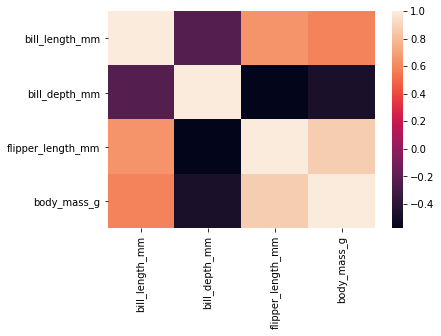

In [13]:
sns.heatmap(dataNorm.corr())

Based on the heatmap and the correlation matrix, I think that they are too positively correlated to include both in the dataset. I will use body_mass_g as it is less positively correlated with bill_length_mm than flipper_length_mm is. As one last check I will check the VIF of each feature.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = dataNorm[['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm']]
  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature       VIF
0      bill_depth_mm  1.601471
1     bill_length_mm  1.853076
2        body_mass_g  4.236152
3  flipper_length_mm  5.940526


Since the flipper_length_mm also has higher VIF, I'll definitely drop that feature.

In [15]:
# removing flipper_length_mm due to correlation/collinearity
dataNorm = dataNorm.drop('flipper_length_mm', axis=1)
dataNorm.head()

,species,island,bill_length_mm,bill_depth_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.894695,0.779559,-0.567621,male
1,Adelie,Torgersen,-0.821552,0.119404,-0.505525,female
2,Adelie,Torgersen,-0.675264,0.424091,-1.188572,female
4,Adelie,Torgersen,-1.333559,1.084246,-0.940192,female
5,Adelie,Torgersen,-0.858123,1.744400,-0.691811,male


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Now the data is normalized, balanced, and collinearity has been reduced. It's time to create training and test sets and then create the different types of models. While there shouldn't be any major issues with the data, cross validating across multiple different models may take some time.

## Model Creation

In [17]:
## Creating training and test datasets
X = dataNorm.drop('species', axis = 1)
X = pd.get_dummies(X)
y = dataNorm['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(223, 8)
(110, 8)


In [18]:
### Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = list(range(2,22,2))

param_grid = {'criterion':criterion,'max_depth':max_depth}

clf = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv=3)

clf.fit(X_train, y_train)

y_predClf = clf.predict(X_test)

print(clf.best_estimator_)
print((accuracy_score(y_test, y_predClf)))

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
0.9727272727272728


Using the best model which has max_depth = 4 and uses entropy as the criterion, with an accuracy around 0.97.

In [19]:
### Random Forest Classifier
max_depth = list(range(2,22,2))
n_estimators = list(range(10,210,10))

param_grid = {'n_estimators':n_estimators,'max_depth':max_depth}

rf = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv = 3)
rf.fit(X_train, y_train)

y_predRf = rf.predict(X_test)

print(rf.best_estimator_)
print((accuracy_score(y_test, y_predRf)))

RandomForestClassifier(max_depth=6, n_estimators=20, random_state=42)
0.990909090909091


Using the best model for the Random Forest Classifier, the parameters are a max_depth of 6 and 20 estimators. This had an accuracy of roughly 0.99.

In [20]:
### Support Vector Classifier

param_grid = [{"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]}]

svc = GridSearchCV(SVC(random_state = 42), param_grid, cv = 3)
svc.fit(X_train, y_train)

y_predSVC = svc.predict(X_test)

print(svc.best_estimator_.get_params())
print((accuracy_score(y_test, y_predSVC)))

{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.990909090909091


Using the best model for the SVC, the parameters are kernel = 'rbf', C = 100, and gamma = 0.001. Interestingly enough, it has the same accuracy as the Random Forest Classifier at 0.99.

## Results and Conclusions

Overall we saw that the Random Forest Classifier and SVC performed slightly better than the Decision Tree Classifier when it comes to accuracy. To dive into this a little further, let's look at the confusion matrices and heatmaps for each:

<AxesSubplot:>

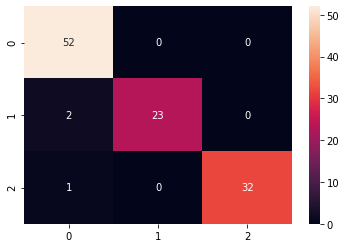

In [21]:
#Decision Tree Confusion Matrix
clf_cf = confusion_matrix(y_test, y_predClf)

sns.heatmap(clf_cf, annot = True)

<AxesSubplot:>

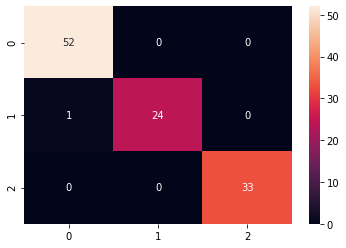

In [22]:
#Decision Tree Confusion Matrix
rf_cf = confusion_matrix(y_test, y_predRf)

sns.heatmap(rf_cf, annot = True)

<AxesSubplot:>

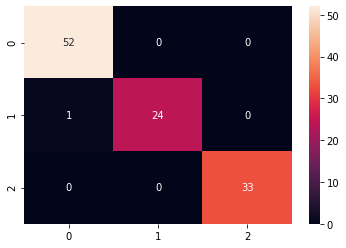

In [24]:
#Decision Tree Confusion Matrix
svc_cf = confusion_matrix(y_test, y_predSVC)

sns.heatmap(svc_cf, annot = True)

As we can see from the above heatmaps, the Random Forest Classifier and SVC classified one species incorrectly one time, while the Decision Tree Classifier the same species incorrectly 3 times. This could be down to parameters and cross-validation results, though I tried to be broad enough in the selection to get a good mix. Overall the Random Forest Classifier and SVC performed the highest with an accuracy of 0.99 while the Decision Tree Classifier had an accuracy of 0.97. Accuracy was chosen as the data is imbalanced and the entire idea is to be able to predict which species a penguin is. I imagine if there were more features forward selection would be a good way to determine which features to include, but with only 7 total features and one being removed for collinearity, forward selection wasn't necessary here. 

Going forward, it may be nice to expand this data to more recent data if it is available, as the data only goes as far as 2009. It may also be interesting to include the year each of these measurements were taken as there may be some change over time. Overall this was an interesting project to learn more about penguins, as well as how it's possible to predict accurately which species a certain penguin is based on some other measurements.